In [796]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style='darkgrid')

In [797]:
cstm = pd.read_csv('../data/customer.csv')
cstm.head()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8


In [798]:
terminal = pd.read_csv('../data/terminal.csv')
terminal.head()

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,41.702200,72.032449
1,1,0.011437,30.233257
2,2,14.675589,9.233859
3,3,18.626021,34.556073
4,4,39.676747,53.881673


Columns in customer.csv
CUSTOMER_ID - customer ID
x_customer_id - x-coordinate of the customer
y_customer_id - y-coordinate of the customer
mean_amount - mean amount spent by the customer
std_amount - standard deviation of the amount spent by the customer
mean_nb_tx_per_day - mean number of transactions made by the customer per day
available_terminals - terminals where the customer is able to make transactions. We assume that customers can only make transactions at terminals within a radius of 5 units from the location of the customer
nb_terminals - number of terminals that the customer can make transactions
Columns in terminal.csv
TERMINAL_ID - terminal ID
x_terminal_id - x-coordinate of the terminal
y_terminal_id - y-coordinate of the terminal

In [799]:
print(f'Rows: {cstm.shape[0]} | Columns: {cstm.shape[1]} (Customers)')
print(f'Rows: {terminal.shape[0]} | Columns: {terminal.shape[1]} (Terminal)')

Rows: 1000 | Columns: 8 (Customers)
Rows: 2000 | Columns: 3 (Terminal)


In [800]:
df = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

# df = pd.concat([df_train, df_test], ignore_index=True)

print(f"The combined dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

print(f"The combined dataframe has {df.isnull().sum().sum()} missing values.")


print(df.describe())



The combined dataframe has 291231 rows and 6 columns.
The combined dataframe has 0 missing values.
       TRANSACTION_ID    CUSTOMER_ID    TERMINAL_ID      TX_AMOUNT  \
count   291231.000000  291231.000000  291231.000000  291231.000000   
mean    204998.000000     496.256202     993.718526      53.182274   
std      84071.292461     285.274966     575.267551      39.573329   
min      59383.000000       0.000000       0.000000       0.000000   
25%     132190.500000     249.000000     496.000000      21.130000   
50%     204998.000000     498.000000    1000.000000      44.770000   
75%     277805.500000     741.000000    1483.000000      76.850000   
max     350613.000000     999.000000    1999.000000     291.150000   

            TX_FRAUD  
count  291231.000000  
mean        0.022601  
std         0.148627  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [801]:
cstm.columns = [x.lower() for x in cstm.columns]
terminal.columns = [x.lower() for x in terminal.columns]
df.columns = [x.lower() for x in df.columns]

In [802]:
df.head()


,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_fraud
0,59383,2021-08-01 00:04:37,323,217,4.60,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0


In [803]:
print(df['tx_fraud'].isna().sum())

0


In [804]:
df.groupby('tx_fraud')['transaction_id'].count()

tx_fraud
0    284649
1      6582
Name: transaction_id, dtype: int64

<Axes: xlabel='tx_fraud'>

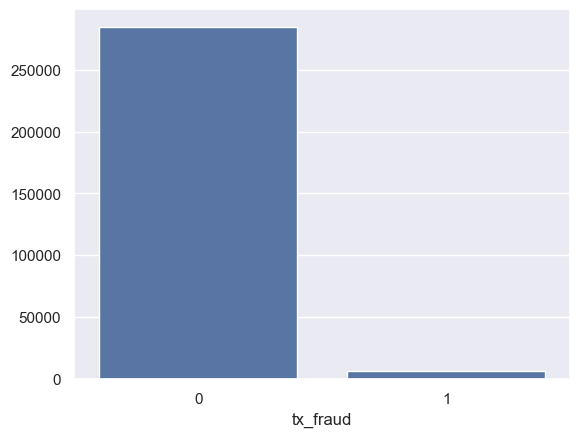

In [805]:
fraud_counts = df['tx_fraud'].value_counts(dropna=False)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)

In [806]:

df = pd.merge(df, terminal, on='terminal_id', how='left')
df = pd.merge(df, cstm, on='customer_id', how='left')


In [807]:
df = df.drop_duplicates()

In [808]:
df[df['tx_fraud'].isna()]['customer_id'].nunique()

0

In [809]:
df.columns

Index(['transaction_id', 'tx_datetime', 'customer_id', 'terminal_id',
       'tx_amount', 'tx_fraud', 'x_terminal_id', 'y_terminal_id',
       'x_customer_id', 'y_customer_id', 'mean_amount', 'std_amount',
       'mean_nb_tx_per_day', 'available_terminals', 'nb_terminals'],
      dtype='object')

df.dtypes

In [810]:
df['tx_datetime'] = pd.to_datetime(df['tx_datetime'])

In [811]:
df.head()

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_fraud,x_terminal_id,y_terminal_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,59383,2021-08-01 00:04:37,323,217,4.60,0,80.316334,40.239252,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19
1,59384,2021-08-01 00:12:10,6,429,8.61,0,15.172487,63.912685,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,74.196424,98.288079,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.950635,6.563484,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.417972,26.483666,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20


<Axes: xlabel='tx_datetime'>

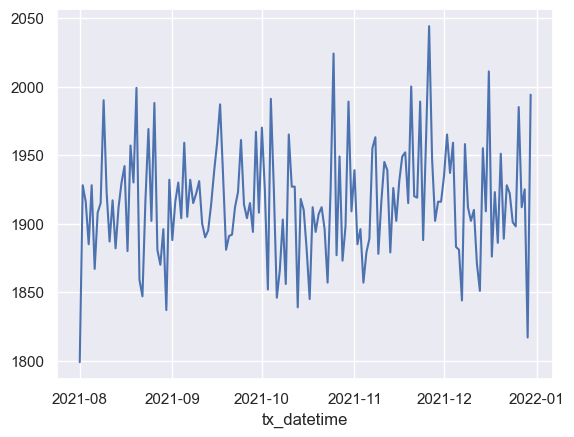

In [812]:
df.groupby(df.tx_datetime.dt.date)['transaction_id'].count().plot()

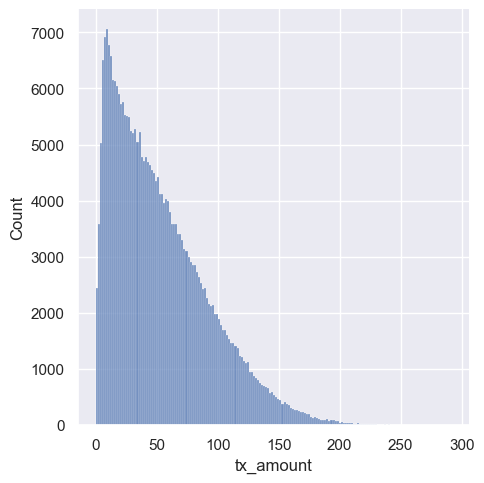

In [813]:
sns.displot(x='tx_amount', data=df)

In [814]:
labels=["Не фрод","фрод"]

fraud_or_not = df["tx_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['tx_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Фрод vs Не фрод транзакции")
fig.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_14096\45890067.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




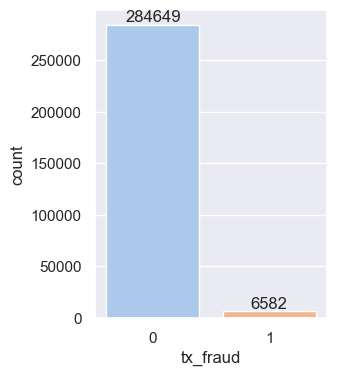

In [815]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='tx_fraud',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [816]:
df['amount_above_mean'] = df['tx_amount'] - df['mean_amount'] 
df['deviation_std'] = round((df['tx_amount'] - df['mean_amount']) / df['std_amount'], 5)
df.head()

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_fraud,x_terminal_id,y_terminal_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,amount_above_mean,deviation_std
0,59383,2021-08-01 00:04:37,323,217,4.60,0,80.316334,40.239252,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,-2.753061,-0.74882
1,59384,2021-08-01 00:12:10,6,429,8.61,0,15.172487,63.912685,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16,-10.008562,-1.07512
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,74.196424,98.288079,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13,-18.620413,-0.45075
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.950635,6.563484,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15,2.867829,0.58217
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.417972,26.483666,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20,15.219965,0.36385


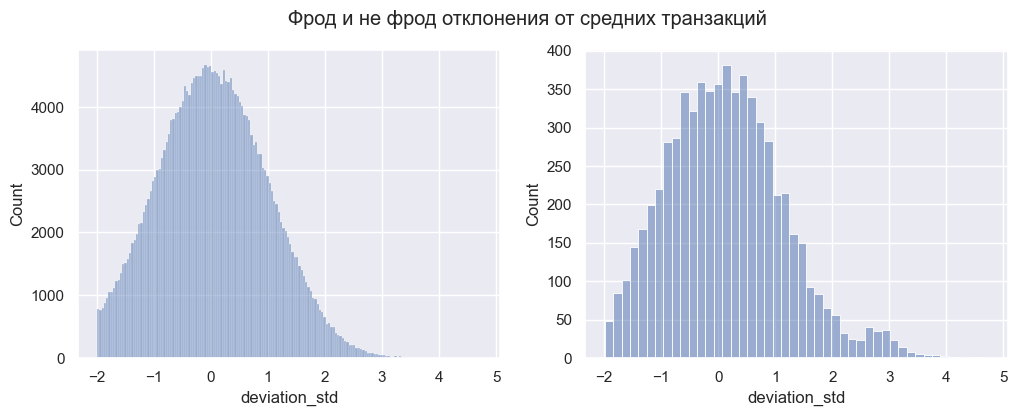

In [817]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharex=True, sharey=False)

sns.histplot(x='deviation_std', alpha=0.5, data=df.query('tx_fraud == 0'), ax=axs[0])
sns.histplot(x='deviation_std', alpha=0.5, data=df.query('tx_fraud == 1'), ax=axs[1]);
plt.suptitle('Фрод и не фрод отклонения от средних транзакций\n');

In [818]:
df['deviation_big'] = (df['deviation_std'] > 1.96).astype(int)

In [819]:
df['hour'] = df['tx_datetime'].dt.hour
df['day_of_week'] = df['tx_datetime'].dt.day_of_week
df.head()

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_fraud,x_terminal_id,y_terminal_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,amount_above_mean,deviation_std,deviation_big,hour,day_of_week
0,59383,2021-08-01 00:04:37,323,217,4.60,0,80.316334,40.239252,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,-2.753061,-0.74882,0,0,6
1,59384,2021-08-01 00:12:10,6,429,8.61,0,15.172487,63.912685,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16,-10.008562,-1.07512,0,0,6
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,74.196424,98.288079,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13,-18.620413,-0.45075,0,0,6
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.950635,6.563484,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15,2.867829,0.58217,0,0,6
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.417972,26.483666,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20,15.219965,0.36385,0,0,6


In [820]:
df['log_amount'] = round(np.log(df['tx_amount']),5)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



In [821]:
df = df.sort_values(by=['customer_id', 'tx_datetime'])
df['minutes_since_last_tx'] = df.groupby('customer_id')['tx_datetime'].diff().apply(lambda x: x.seconds/60).round()
df['minutes_since_last_tx'] = df['minutes_since_last_tx'].fillna(method='bfill')

In [822]:
df.columns

Index(['transaction_id', 'tx_datetime', 'customer_id', 'terminal_id',
       'tx_amount', 'tx_fraud', 'x_terminal_id', 'y_terminal_id',
       'x_customer_id', 'y_customer_id', 'mean_amount', 'std_amount',
       'mean_nb_tx_per_day', 'available_terminals', 'nb_terminals',
       'amount_above_mean', 'deviation_std', 'deviation_big', 'hour',
       'day_of_week', 'log_amount', 'minutes_since_last_tx'],
      dtype='object')

In [823]:
df.head()

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_fraud,x_terminal_id,y_terminal_id,x_customer_id,y_customer_id,...,mean_nb_tx_per_day,available_terminals,nb_terminals,amount_above_mean,deviation_std,deviation_big,hour,day_of_week,log_amount,minutes_since_last_tx
69,59452,2021-08-01 03:01:00,0,1133,61.51,0,52.165931,71.231220,54.88135,71.518937,...,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22,-0.752521,-0.02417,0,3,6,4.11920,150.0
209,59592,2021-08-01 05:30:38,0,1138,129.61,0,52.690535,75.386907,54.88135,71.518937,...,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22,67.347479,2.16334,1,5,6,4.86453,150.0
749,60132,2021-08-01 10:40:12,0,1530,96.50,0,50.098401,72.962338,54.88135,71.518937,...,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22,34.237479,1.09978,0,10,6,4.56954,310.0
1338,60721,2021-08-01 15:38:25,0,241,82.19,0,55.851655,69.022787,54.88135,71.518937,...,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22,19.927479,0.64011,0,15,6,4.40903,298.0
1650,61033,2021-08-01 19:25:30,0,1536,50.77,0,55.782899,71.228100,54.88135,71.518937,...,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22,-11.492521,-0.36916,0,19,6,3.92731,227.0


In [824]:
allLat  = list(df['y_customer_id']) + list(df['y_terminal_id'])
medianLat  = sorted(allLat)[int(len(allLat)/2)]
latMultiplier  = 111.32

df['y_customer_id']   = latMultiplier  * (df['y_customer_id']   - medianLat)
df['y_terminal_id']   = latMultiplier  * (df['y_terminal_id']  - medianLat)
allLong = list(df['x_customer_id']) + list(df['x_terminal_id'])

medianLong  = sorted(allLong)[int(len(allLong)/2)]

longMultiplier = np.cos(medianLat*(np.pi/180.0)) * 111.32
### Your code is here

df['x_customer_id']  = longMultiplier * (df['x_customer_id']  - medianLong)
df['x_terminal_id']  = longMultiplier * (df['x_terminal_id'] - medianLong)

df.head(5)
### Your code is here

df['long_diff'] = df['x_terminal_id'] - df['x_customer_id']
df['lat_diff'] = df['y_terminal_id'] - df['y_customer_id']

df['distance_km'] = round((df['long_diff']**2 + df['lat_diff']**2)**(1/2), 2)

df = df.drop(['long_diff', 'lat_diff'], axis=1)

In [825]:
df['terminal_in_available'] = df.apply(lambda row: int(row['terminal_id'] in row['available_terminals'].replace('[', '').replace(']', '').split(',')), axis=1)


In [826]:
df['terminal_in_available'].max()

0

In [827]:
df = df.drop(['transaction_id', 'terminal_id', 'terminal_id', 'tx_datetime', 'customer_id','x_terminal_id', 'y_terminal_id', 'x_customer_id', 'y_customer_id', 'terminal_in_available', 'available_terminals'], axis=1)

In [828]:
df.head()

,tx_amount,tx_fraud,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,amount_above_mean,deviation_std,deviation_big,hour,day_of_week,log_amount,minutes_since_last_tx,distance_km
69,61.51,0,62.262521,31.13126,2.179533,22,-0.752521,-0.02417,0,3,6,4.11920,150.0,200.59
209,129.61,0,62.262521,31.13126,2.179533,22,67.347479,2.16334,1,5,6,4.86453,150.0,459.27
749,96.50,0,62.262521,31.13126,2.179533,22,34.237479,1.09978,0,10,6,4.56954,310.0,384.02
1338,82.19,0,62.262521,31.13126,2.179533,22,19.927479,0.64011,0,15,6,4.40903,298.0,286.74
1650,50.77,0,62.262521,31.13126,2.179533,22,-11.492521,-0.36916,0,19,6,3.92731,227.0,73.28


In [829]:
df = df.round({'mean_amount':5,'std_amount':5,'mean_nb_tx_per_day':5,'amount_above_mean':5})

In [830]:
float64_cols = list(df.select_dtypes(include='float64'))
df[float64_cols] = df[float64_cols].astype('float32')

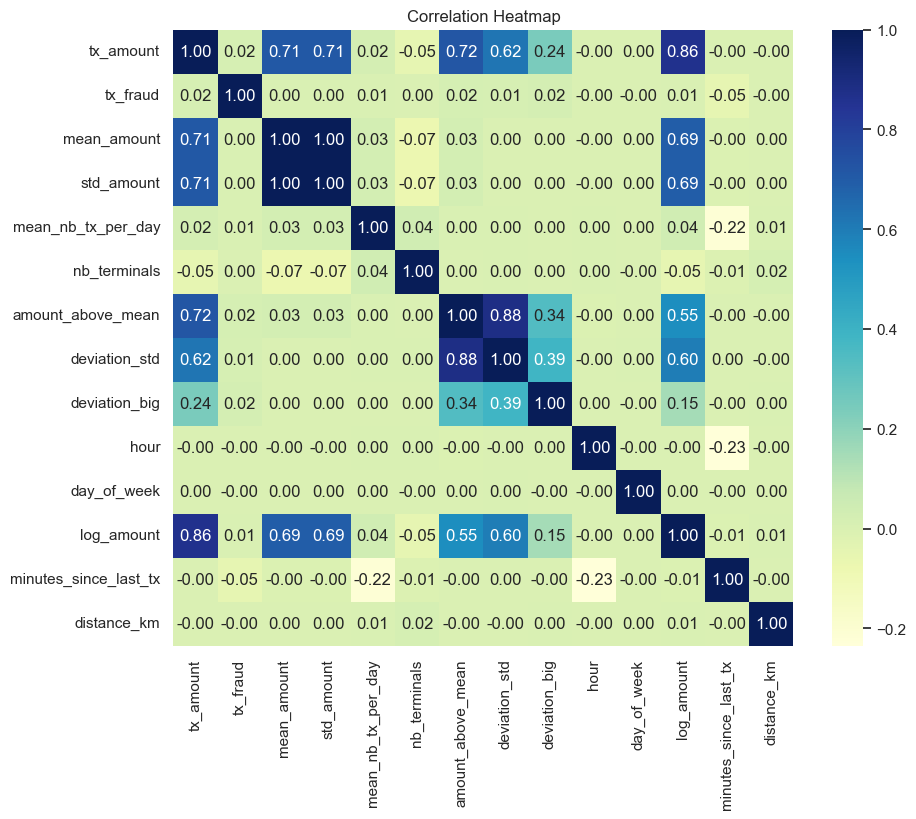

In [831]:

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


In [832]:
df.to_csv('../data/df_processed.csv', index=False)